# Lab 6: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 6.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will for the first time use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.tools.plotting import scatter_matrix
import pandas as p
%matplotlib inline

Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

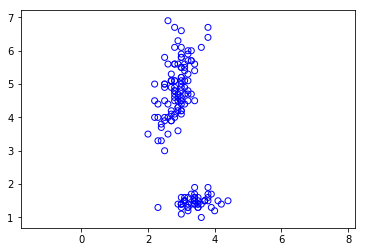

In [2]:
iris = datasets.load_iris()
d = iris.data
y = iris.target

plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [3]:
A=range(0,20)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

Let us now plot the dendrogram. 

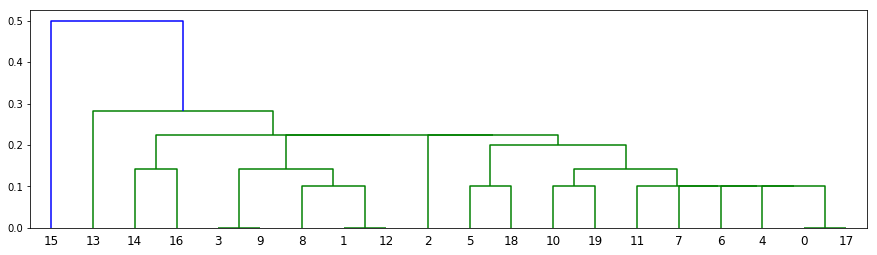

In [4]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

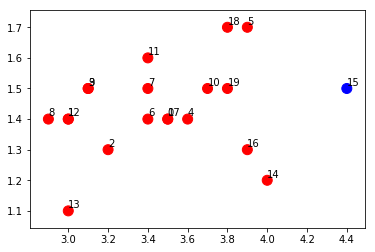

In [5]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
- Use a metric other than 'Eucliedean'. Discuss the result.

**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters.

Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

#### Question 1

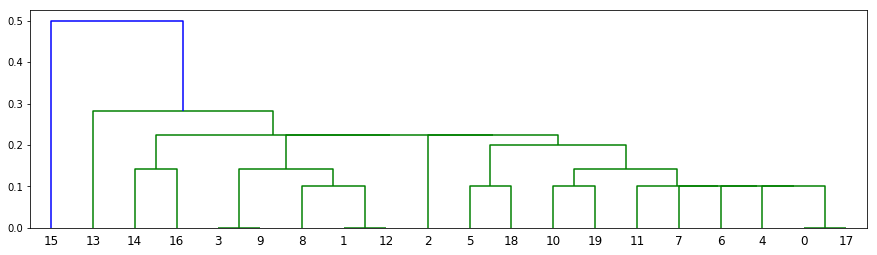

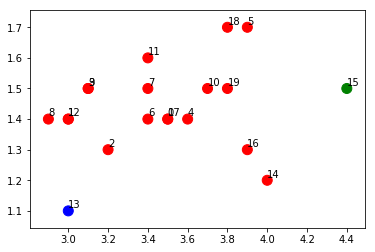

In [6]:
Z = hierarchy.linkage(dnew, method = 'single', metric = 'euclidean')
cl1 = hierarchy.fcluster(Z, 3, criterion = 'maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);
plt.figure()
colors = ['red', 'blue', 'green']
plt.scatter(dnew[A,0], dnew[A,1], c= cl1, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in A:
    plt.text(dnew[i,0], dnew[i,1] + 0.01, s = str(i), size = 10)

Now that we have three clusters: 15 and 13 standing alone, and there are a lot of 'red'. Let's try method = 'average' and method = 'ward'

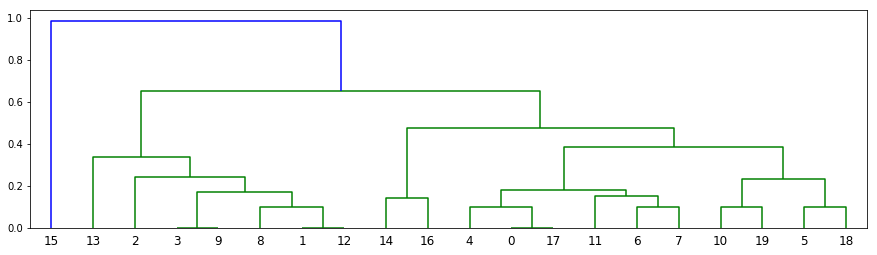

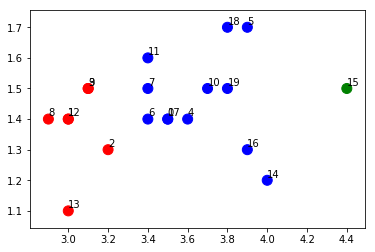

In [7]:
Z1 = hierarchy.linkage(dnew, method = 'average', metric = 'euclidean')
cl2 = hierarchy.fcluster(Z1,3,criterion = 'maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z1)
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(dnew[A,0], dnew[A,1], c = cl2, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in A:
    plt.text(dnew[i,0], dnew[i,1] + 0.01, s = str(i), size = 10)

there are now a lot of differences in this version of dendrogram and scatterplot. Although 15 is still standing alone, 13 now has some more 'friends'. Let's look at the Z1 and the Z matrix to explore what is happening

In [8]:
print Z
print '\n'
print Z1

[[  0.          17.           0.           2.        ]
 [  3.           9.           0.           2.        ]
 [  1.          12.           0.           2.        ]
 [ 10.          19.           0.1          2.        ]
 [  4.          20.           0.1          3.        ]
 [  6.          24.           0.1          4.        ]
 [  7.          25.           0.1          5.        ]
 [ 11.          26.           0.1          6.        ]
 [  5.          18.           0.1          2.        ]
 [  8.          22.           0.1          3.        ]
 [ 23.          27.           0.14142136   8.        ]
 [ 21.          29.           0.14142136   5.        ]
 [ 14.          16.           0.14142136   2.        ]
 [ 28.          30.           0.2         10.        ]
 [  2.          33.           0.2236068   11.        ]
 [ 31.          34.           0.2236068   16.        ]
 [ 32.          35.           0.2236068   18.        ]
 [ 13.          36.           0.28284271  19.        ]
 [ 15.    

okay!!! Now there are a lot of differences in the distance calculated between two nodes. As a result, the order of the cluster and how clusters are paired is now different. The distance between the cluster containing 1,2,3,9,8,12 and 13 is now smaller compared to the distance between the cluster containing 1,2,3,9,8,12 and the cluster containing the blue points. As a result, 13 is no longer 'lonely'. It is noticeable that the average distance is in general bigger than the single-link distance! Now let's try the ward method!

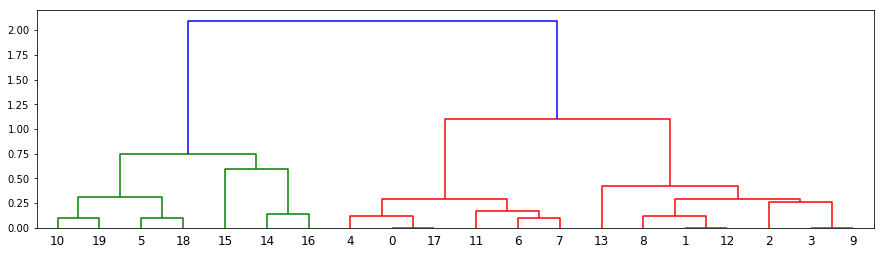

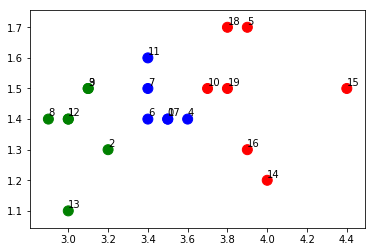

In [9]:
Z2 = hierarchy.linkage(dnew, method = 'ward', metric = 'euclidean')
cl3 = hierarchy.fcluster(Z2,3,criterion = 'maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z2)
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(dnew[A,0], dnew[A,1], c = cl3, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in A:
    plt.text(dnew[i,0], dnew[i,1] + 0.01, s = str(i), size = 10)

We have a pretty equal three groups this time! 13 is still in the same group with 1,2,3,8,9,12 and 15 now has some 'friends'! Let's look at what is happening in the Z matrix! 

In [10]:
print Z 
print '\n'
print Z2

[[  0.          17.           0.           2.        ]
 [  3.           9.           0.           2.        ]
 [  1.          12.           0.           2.        ]
 [ 10.          19.           0.1          2.        ]
 [  4.          20.           0.1          3.        ]
 [  6.          24.           0.1          4.        ]
 [  7.          25.           0.1          5.        ]
 [ 11.          26.           0.1          6.        ]
 [  5.          18.           0.1          2.        ]
 [  8.          22.           0.1          3.        ]
 [ 23.          27.           0.14142136   8.        ]
 [ 21.          29.           0.14142136   5.        ]
 [ 14.          16.           0.14142136   2.        ]
 [ 28.          30.           0.2         10.        ]
 [  2.          33.           0.2236068   11.        ]
 [ 31.          34.           0.2236068   16.        ]
 [ 32.          35.           0.2236068   18.        ]
 [ 13.          36.           0.28284271  19.        ]
 [ 15.    

It is noticeable that the ward method has a much bigger distance than the single-link method! What is happenning is that the distance between the cluster of 18,5,10,9,16,14 is now closer to 15 than to the cluster containing blue points.

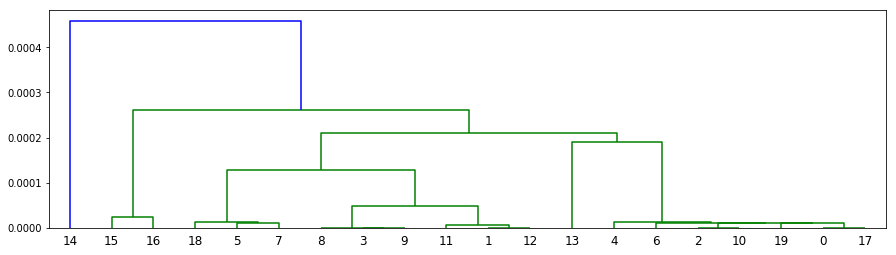

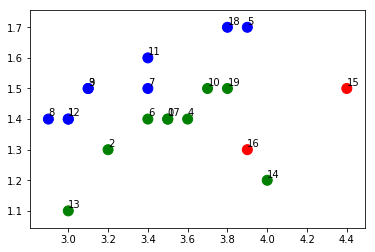

In [11]:
Z3 = hierarchy.linkage(dnew, method = 'single', metric = 'cosine')
cl4 = hierarchy.fcluster(Z3,4,criterion = 'maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z3)
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(dnew[A,0], dnew[A,1], c = cl4, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in A:
    plt.text(dnew[i,0], dnew[i,1] + 0.01, s = str(i), size = 10)

We have some significant differences this time. 15 has one 'friend', and 13 is now in the same cluster with 0,2,6,7,4,10,17,19. The most surprising thing is 16 is in the same cluster with 15 not 6,7,4,10,19,and 14!

In [12]:
print Z
print '\n'
print Z3

[[  0.          17.           0.           2.        ]
 [  3.           9.           0.           2.        ]
 [  1.          12.           0.           2.        ]
 [ 10.          19.           0.1          2.        ]
 [  4.          20.           0.1          3.        ]
 [  6.          24.           0.1          4.        ]
 [  7.          25.           0.1          5.        ]
 [ 11.          26.           0.1          6.        ]
 [  5.          18.           0.1          2.        ]
 [  8.          22.           0.1          3.        ]
 [ 23.          27.           0.14142136   8.        ]
 [ 21.          29.           0.14142136   5.        ]
 [ 14.          16.           0.14142136   2.        ]
 [ 28.          30.           0.2         10.        ]
 [  2.          33.           0.2236068   11.        ]
 [ 31.          34.           0.2236068   16.        ]
 [ 32.          35.           0.2236068   18.        ]
 [ 13.          36.           0.28284271  19.        ]
 [ 15.    

#### Question 2

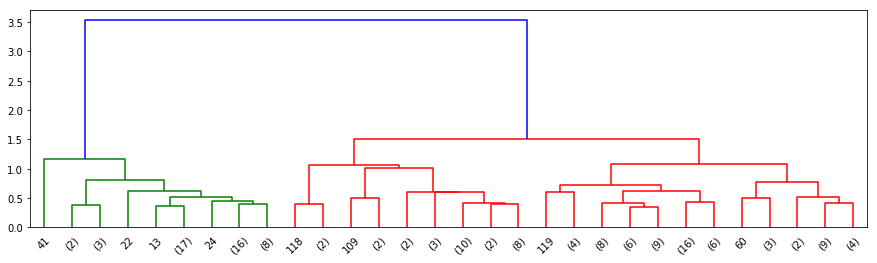

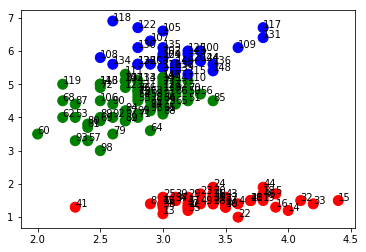

In [13]:
dnew = d[:,1:3]
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z, truncate_mode = 'lastp')
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(dnew[:,0], dnew[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in range(len(dnew)):
    plt.text(dnew[i,0], dnew[i,1] + 0.01, s = str(i), size = 10)

Because we have three types of flowers, it makes sense that we should have 3 clusters because we would want to group the flowers with the same type together in one cluster using their 2nd and 3th attributes. If we don't know the flower types, it would be best to look at the dendrogram and see where should we place the 'cut'. This is very subjective. But based on the dendrogram above, as for me, using 3 clusters would work best! Even if we increases the number of clusters to 5, the dendrogram still looks like 3 clusters would be best and scatter plot now doesn't make more sense

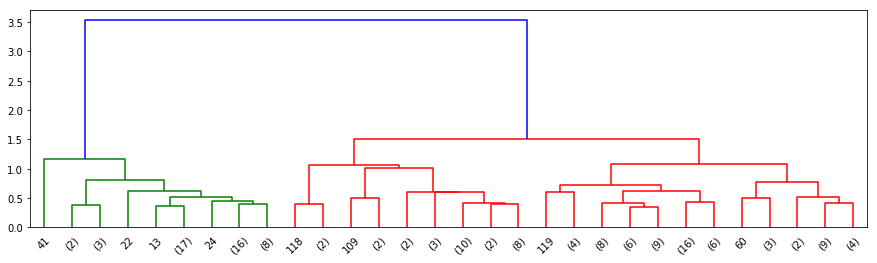

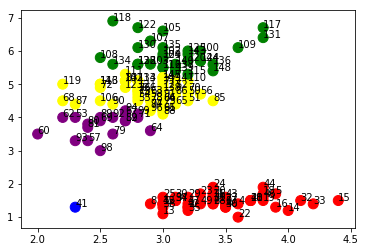

In [14]:
dnew = d[:,1:3]
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z, truncate_mode = 'lastp')
colors = ['red', 'blue', 'green', 'yellow', 'purple']
plt.figure()
plt.scatter(dnew[:,0], dnew[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in range(len(dnew)):
    plt.text(dnew[i,0], dnew[i,1] + 0.01, s = str(i), size = 10)

In [15]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

y    0   1   2
cl            
1   50   0   0
2    0   0  31
3    0  50  19


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job?

**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters.

**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. You task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please jsutify why you selected the formula.

**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternativelly, do SVD to project your data to 2 dimensionas and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

#### Question 3

Well, I think the clustering did a pretty good job. Clustering correctly predicts first type and second type of flower correctly although 19 second-type flowers get missed classified as the third type, which is not too bad because we only use 2 attributes out of 4 attributes. Maybe, it is because those 19 type 3 flowers have very similar 2nd and 3rd attributes to type 2 flowers

#### Question 4

In [16]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print '3 clusters'
print crosstab(cl, y, rownames=['cl'], colnames=['y'])
dnew = d[:,1:3]
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')
print '\n'
print '4 clusters'
print crosstab(cl, y, rownames=['cl'], colnames=['y'])
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
print '\n'
print '5 clusters'
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

3 clusters
y    0   1   2
cl            
1   50   0   0
2    0   0  31
3    0  50  19


4 clusters
y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  50  19


5 clusters
y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  31  19
5    0  19   0


4-cluster result doesn't give us more information than the 3-cluster result. I feel like the 5-cluster result better than the 4-cluster result, because we can now clearly see that 31 flowers of the second type and 19 flowers of the third type somehow have very similar 2nd,3rd attributes

#### Question 5

I think I would use adjusted rand index to evaluate the success of clustering. The document can be found here:http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation. I choose this scores because: the adjusted Rand index is a function that measures the similarity of the true assignment and the predicted assignment, ignoring permutations and with chance normalization. The adjusted Rand index has the maximum value 1, and its expected value is 0 in the case of random clusters.If C is a ground truth class assignment and K the clustering, let us define a and b as:

    a, the number of pairs of elements that are in the same set in C and in the same set in K
    b, the number of pairs of elements that are in different sets in C and in different sets in K
    n, the sample size


$$RI = \frac{a+b}{\binom{n}{2}}$$

$$ARI = \frac{RI - E[RI]}{max(RI) - E[RI]}$$

The drawback is ARI requires knowledge of the ground truth classes while is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

However, here we have the truth values, so this method would work

#### Question 6

In [17]:
import numpy as np
dnew = d
U,s,V = np.linalg.svd(dnew, full_matrices = 0)
print U.shape, s.shape, V.shape
data = np.dot(U[:,:2],np.diag(s)[0:2,0:2])
print d.shape, data.shape

(150L, 4L) (4L,) (4L, 4L)
(150L, 4L) (150L, 2L)


y    0   1   2
cl            
1   50   0   0
2    0   0   9
3    0  50  41


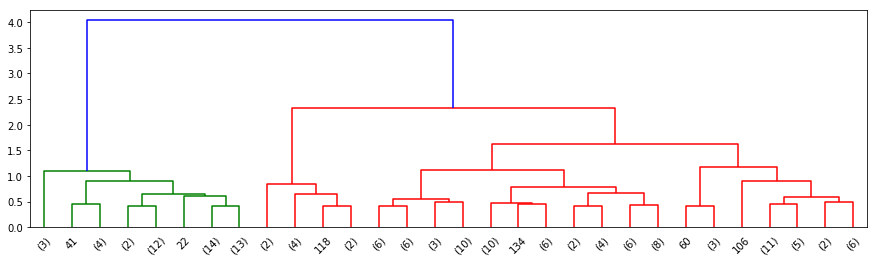

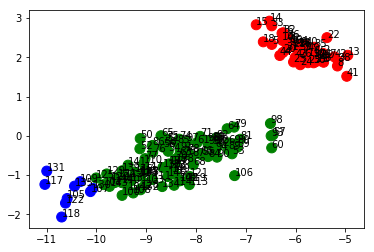

In [18]:
Z = hierarchy.linkage(data,method = 'average', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z, truncate_mode = 'lastp')
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(data[:,0], data[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in range(len(dnew)):
    plt.text(data[i,0], data[i,1] + 0.01, s = str(i), size = 10)

This result is not good, 41 type 3 flowers end up in the same cluster with 50 type 2 flowers.

In [19]:
import itertools
methods = ['single', 'average', 'weighted']
someMetrics = ['braycurtis', 'canberra', 'chebyshev', 'euclidean', 'jaccard','cosine','mahalanobis','minkowski',
               'seuclidean', 'correlation','sqeuclidean']
combo = list(itertools.product(methods, someMetrics))
combo.append(('centroid', 'euclidean'))
combo.append(('median', 'euclidean'))
combo.append(('ward', 'euclidean'))
len(combo)

36

In [20]:
from sklearn import metrics

In [21]:
#now let's try other combination of method and metric and see how it goes!
scores = []
for c in combo:
    print '\n'
    print 'method ', c[0], 'metric ', c[1]
    Z = hierarchy.linkage(data,method = c[0], metric = c[1])
    cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
    print crosstab(cl, y, rownames=['cl'], colnames=['y'])
    scores.append((c[0], c[1], metrics.adjusted_rand_score(y,cl)))
scores = sorted(scores, key = lambda t: t[2])
print scores
#     plt.figure(figsize = (15,4))
#     hierarchy.dendrogram(Z, truncate_mode = 'lastp')
#     colors = ['red', 'blue', 'green']
#     plt.figure()
#     plt.scatter(data[:,0], data[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
#     for i in range(len(dnew)):
#         plt.text(data[i,0], data[i,1] + 0.01, s = str(i), size = 10)



method  single metric  braycurtis
y    0   1   2
cl            
1   50   0   0
2    0   4   0
3    0  46  50


method  single metric  canberra
y    0   1   2
cl            
1    0  45  50
2   50   4   0
3    0   1   0


method  single metric  chebyshev
y    0   1   2
cl            
1   50   0   0
2    0   4   0
3    0  46  50


method  single metric  euclidean
y    0   1   2
cl            
1   50   0   0
2    0   4   0
3    0  46  50


method  single metric  jaccard
y    0   1   2
cl            
1   50  50  50


method  single metric  cosine
y    0   1   2
cl            
1   50   0   0
2    0  50  49
3    0   0   1


method  single metric  mahalanobis
y    0   1   2
cl            
1   50   0   0
2    0   0   2
3    0  50  48


method  single metric  minkowski
y    0   1   2
cl            
1   50   0   0
2    0   4   0
3    0  46  50


method  single metric  seuclidean
y    0   1   2
cl            
1   50   0   0
2    0   4   0
3    0  46  50


method  single metric  correlation
y    

It seems that the combo average-cosine give the best result based on the adjusted rand scores! When looking at the crosstab for average-cosine, we would see that only 3 type 2 flowers and 6 type 3 flowers end up in different clusters from the rest of their types, which is a good result

## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

y    0   1   2
cl            
0   35   0   0
1    0  26  19
2    0   0  31
3    0  24   0
4   15   0   0


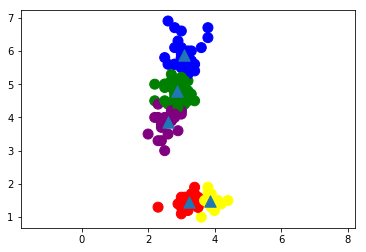

In [22]:
# the following command results in creating of 2 clusters of `dnew` data
dnew = d[:,1:3]
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

**Question 7**. Discuss on the quality of outcome of k-means clustering

**Question 8**. Repeat k-means clustering, but this time change the nnumber of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**.

**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results.

#### Question 7

Well, for me the result is pretty good, because there are only 19 type 3 flowers end up in the same cluster with 26 type 2 flowers. Other than that the rest of type 2 and type 3 flowers end up in different clusters. The results of  K-means clustering also correctly put all type 1 flowers in different clusters from type 2 and type 3. K-means further confirm that those 19 type 3 flowers are very similar to 26 type 2 flowers in the second and third attributes. (Note we are only using 2 out of 4 attributes, so this result is good)

#### Question 8 

y    0   1   2
cl            
0   50   0   0
1    0   2  41
2    0  48   9


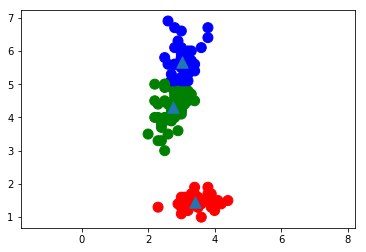

In [23]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(dnew)
cl = kmeans.labels_
cen = kmeans.cluster_centers_
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(dnew[:,0], dnew[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'none')
plt.scatter(cen[:,0], cen[:,1], s =130, marker = "^")
plt.axis('equal')
print crosstab(cl,y,rownames = ['cl'], colnames = ['y'])

Type 1 flowers are correctly put together in one cluster. However, 2 type 2 somehow end up in the same cluster with other 41 type 3 flowers, and 9 type 3 and 48 type 2 flowers end up in the same cluster. There are some misclassifications! In fact the result is pretty good. We can consider that it makes 11 misclassifications in total. Compared to hierarchical results in questions 4, this is in fact better! Let's look at the adjusted rand scores:

In [24]:
metrics.adjusted_rand_score(y,cl)

0.80220854536751918

#### Question 9

In [25]:
U,s,V = np.linalg.svd(d)
print U.shape, s.shape, V.shape
dnew = np.dot(U[:,0:2],np.diag(s)[0:2,0:2])

(150L, 150L) (4L,) (4L, 4L)


y    0   1   2
cl            
0   50   0   0
1    0   3  36
2    0  47  14


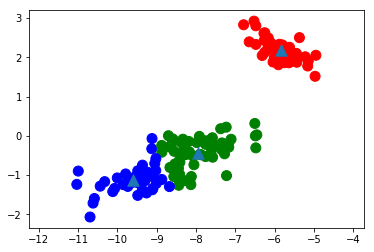

In [26]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(dnew)
cl = kmeans.labels_
cen = kmeans.cluster_centers_
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(dnew[:,0], dnew[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'none')
plt.scatter(cen[:,0], cen[:,1], s = 130, marker = "^")
plt.axis('equal')
print crosstab(cl, y, rownames = ['cl'], colnames = ['y'])

In [27]:
metrics.adjusted_rand_score(y,cl)

0.71634211268384751

With the adjusted rand index as justification, we can conclude that hierarchical clustering does a better job than K-means clustering. The success of hierarchical clustering is thanks to the magic of cosine metric! In question 4, we used the euclidean metric, and hierarchical clustering does worse than K-means clustering in question 8. With cosine metric, hierarchical wins over K-means

## Lab 6.b Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data from **Lab 5**. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data. Use Google search to figure out how to do it in Python. The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering. Use cross-tabulation to measure the quality of clustering.

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering?

In [28]:
import random

Load in the necessary datasets and random sample 100 datapoints

In [29]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
df = p.DataFrame(documents, columns = wordlist)
df['Type'] = newsgroup

In [30]:
rindex = np.array(random.sample(xrange(len(df)),100))
df1 = df.iloc[rindex]

In [31]:
temp = df1.drop('Type',axis = 1)
dataMatrix = temp.as_matrix()
dataMatrix.shape

(100L, 100L)

Reduce dimensionality and do clustering!

In [32]:
U,s,V = np.linalg.svd(dataMatrix,full_matrices = 0)
print U.shape, s.shape, V.shape
A2 = np.dot(U[:,:2], np.diag(s)[0:2,0:2])
print A2.shape

(100L, 100L) (100L,) (100L, 100L)
(100L, 2L)


In [33]:
y = df1['Type'].values
y

array([2, 4, 3, 1, 4, 2, 4, 2, 4, 1, 3, 3, 3, 4, 2, 1, 1, 1, 1, 1, 4, 4, 1,
       4, 2, 1, 1, 1, 4, 4, 2, 4, 1, 1, 1, 3, 4, 1, 4, 3, 3, 4, 4, 4, 1, 2,
       2, 4, 2, 1, 1, 1, 4, 4, 4, 4, 4, 3, 1, 1, 4, 4, 3, 3, 4, 1, 3, 3, 2,
       4, 4, 1, 2, 4, 4, 2, 3, 1, 3, 1, 4, 2, 4, 4, 4, 2, 4, 4, 1, 1, 3, 3,
       1, 4, 2, 1, 2, 1, 4, 1])

y    1   2   3   4
cl                
1   30  16  16  36
2    0   0   0   1
3    1   0   0   0


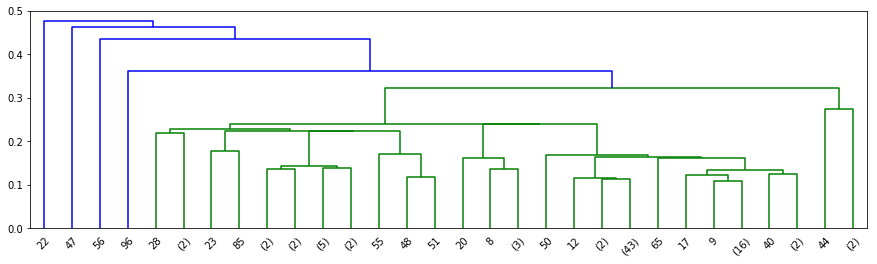

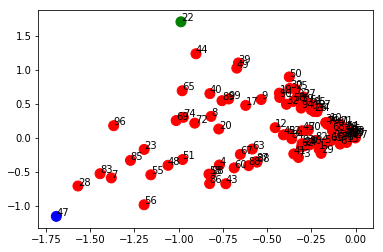

In [34]:
Z = hierarchy.linkage(A2,method = 'single', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z, truncate_mode = 'lastp')
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(A2[:,0], A2[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in range(len(A2)):
    plt.text(A2[i,0], A2[i,1] + 0.01, s = str(i), size = 10)

In [35]:
metrics.adjusted_rand_score(y,cl)

-0.0065520233291056201

The result is pretty bad when almost all the documents end up in the same cluster.....

y    1  2  3   4
cl              
1   27  7  7   5
2    1  3  4   7
3    3  6  5  25


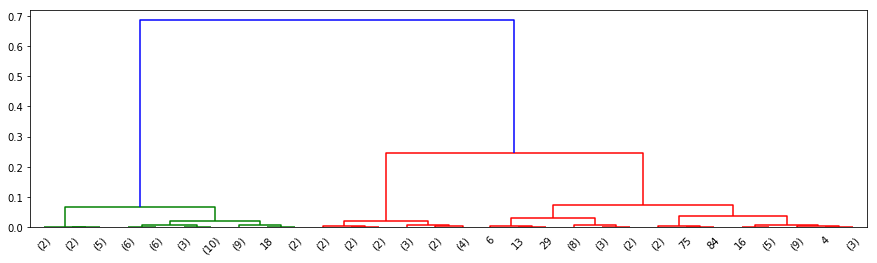

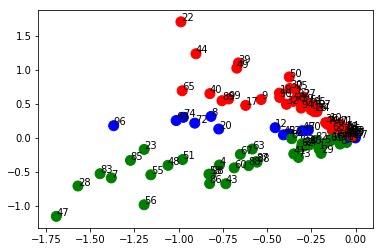

In [36]:
A2 += 1e-4
Z = hierarchy.linkage(A2,method = 'average', metric = 'cosine')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z, truncate_mode = 'lastp')
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(A2[:,0], A2[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in range(len(A2)):
    plt.text(A2[i,0], A2[i,1] + 0.01, s = str(i), size = 10)

In [37]:
metrics.adjusted_rand_score(y,cl)

0.21720873830337911

seem better this time! 

y    1   2   3   4
cl                
1   31  16  16  37


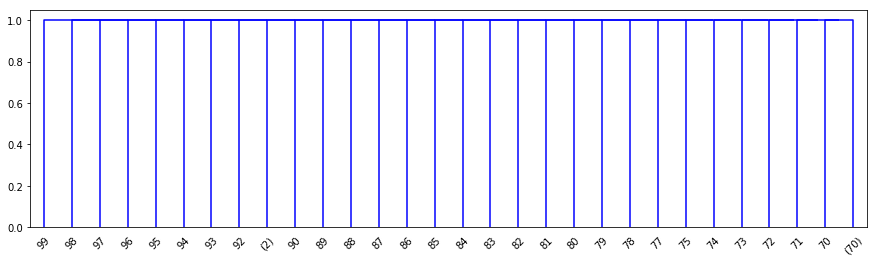

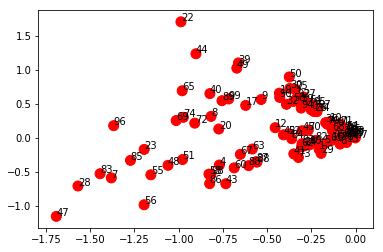

In [38]:
Z = hierarchy.linkage(A2,method = 'average', metric = 'jaccard')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z, truncate_mode = 'lastp')
colors = ['red', 'blue', 'green']
plt.figure()
plt.scatter(A2[:,0], A2[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in range(len(A2)):
    plt.text(A2[i,0], A2[i,1] + 0.01, s = str(i), size = 10)

In [39]:
metrics.adjusted_rand_score(y,cl)

0.0

Well, hierarchical clustering has been producing bad results so far: most documents end up in the same cluster..... Let's see if K-means can do better...

y    1  2   3   4
cl               
0   17  3   3   5
1   12  9  12  18
2    2  4   1  14


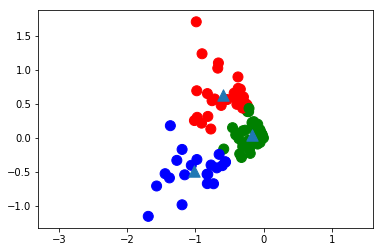

In [40]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(A2)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
colors=['red','green','blue']
plt.figure()
plt.scatter(A2[:,0],A2[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

print crosstab(cl, y, rownames=['cl'], colnames=['y'])

In [41]:
metrics.adjusted_rand_score(y,cl)

0.049959293406192352

Better than single-euclidean and average - jacard, but almost all documents still end up in the same cluster... Hierarchical clustering with average and cosine still works best! Let's see if using 5 clusters can produce something better

y    1  2  3   4
cl              
1    4  2  1   2
2   23  5  6   3
3    1  3  4   7
4    1  0  0  15
5    2  6  5  10


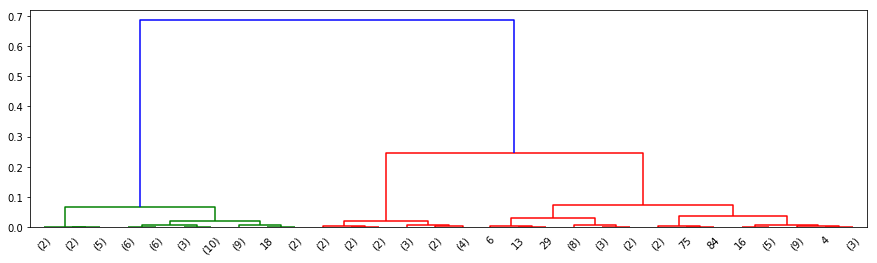

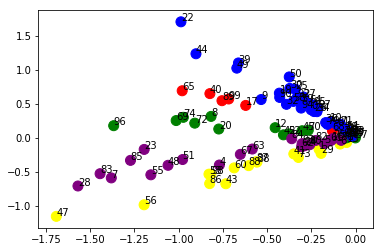

In [42]:
Z = hierarchy.linkage(A2,method = 'average', metric = 'cosine')
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z, truncate_mode = 'lastp')
colors = ['red', 'blue', 'green', 'yellow', 'purple']
plt.figure()
plt.scatter(A2[:,0], A2[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
for i in range(len(A2)):
    plt.text(A2[i,0], A2[i,1] + 0.01, s = str(i), size = 10)

In [43]:
metrics.adjusted_rand_score(y,cl)

0.17727422276027507

y    1  2   3   4
cl               
0   14  3   1   1
1    2  3   1  14
2    9  8  12  18
3    3  2   1   4
4    3  0   1   0


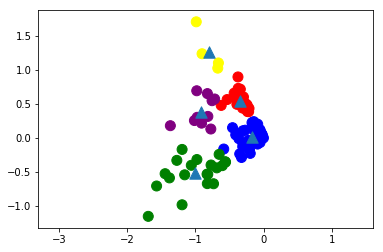

In [44]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(A2)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(A2[:,0],A2[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

In [45]:
metrics.adjusted_rand_score(y,cl)

0.07018689091751916

The documents are more 'spread out', and we can distinguish clusters better now but still not bad results... Let's see if increasing sample size would produce something better

In [46]:
sampleSizes = [200,500,1000,2000,5000]

In [47]:
import time

(200L, 100L) (100L,) (100L, 100L)


time cost  0.000999927520752
sample size  200
y    1   2   3   4
cl                
1    0  12   3  18
2    1   8   1  26
3    0  12   5  15
4    6   8   8   8
5   38   7  17   7
ARI  0.148144992888
(500L, 100L) (100L,) (100L, 100L)


time cost  0.00899982452393
sample size  500
y     1   2   3   4
cl                 
1     5  23  11  43
2     0  40  10  88
3   100  13  14  11
4    25  10  18  12
5    12  18  17  30
ARI  0.207325963754
(1000L, 100L) (100L,) (100L, 100L)


time cost  0.0350000858307
sample size  1000
y     1   2   3    4
cl                  
1    81  36  37   19
2   155  15  19    6
3     1  34  23  197
4    30  59  32   23
5    12  58  50  113
ARI  0.230165808404
(2000L, 100L) (100L,) (100L, 100L)


time cost  0.138000011444
sample size  2000
y     1    2    3    4
cl                    
1   328   33   63    7
2   192   99  116   41
3    43   91   69  110
4     6   49   25  308
5    13  123   68  216
ARI  0.202303568834
(5000L, 100L)

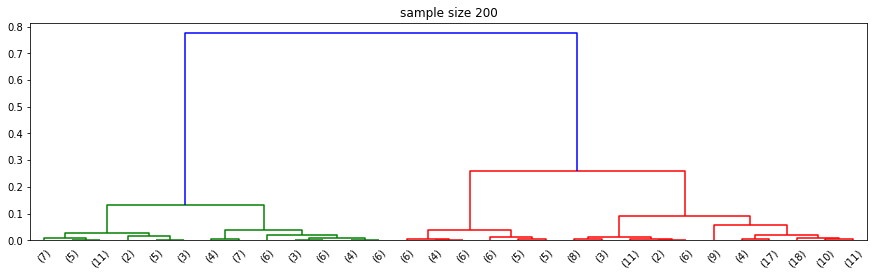

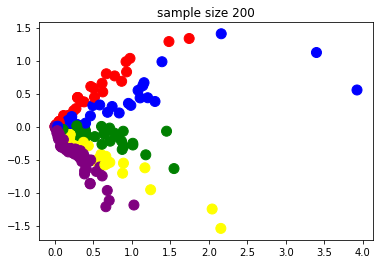

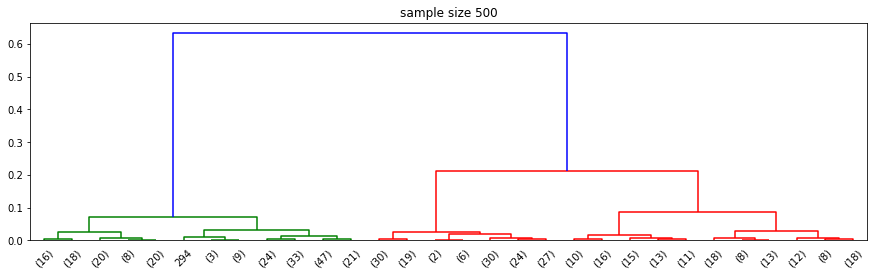

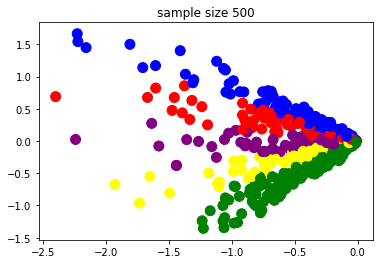

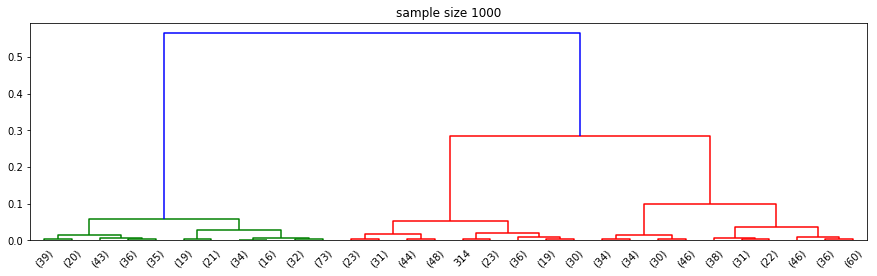

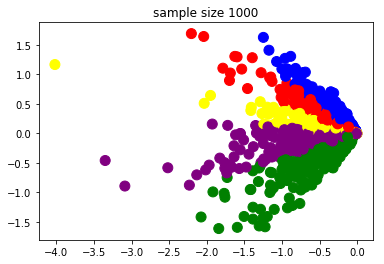

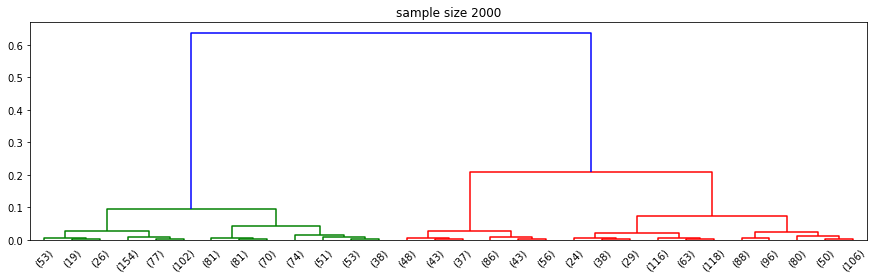

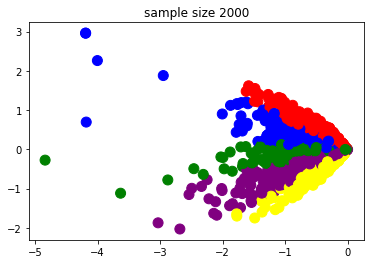

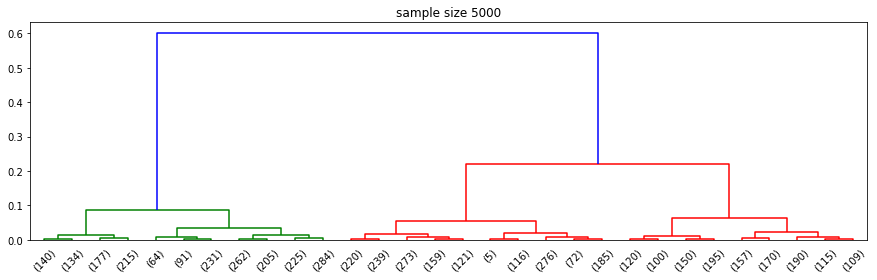

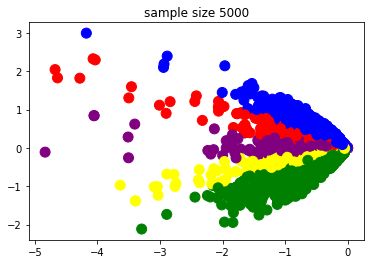

In [48]:
for size in sampleSizes:
    rindex = np.array(random.sample(xrange(len(df)),size))
    df2 = df.iloc[rindex]
    temp = df2.drop('Type',axis = 1)
    dataMatrix = temp.as_matrix()
    U,s,V = np.linalg.svd(dataMatrix,full_matrices = 0)
    print U.shape, s.shape, V.shape
    B2 = np.dot(U[:,:2], np.diag(s)[0:2,0:2])
    y = df2['Type'].values
    B2 += 1e-4
    start = time.time()
    Z = hierarchy.linkage(B2,method = 'average', metric = 'cosine')
    cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
    end = time.time()
    print '\n'
    print 'time cost ', end - start
    print 'sample size ', size
    print crosstab(cl, y, rownames=['cl'], colnames=['y'])
    print 'ARI ', metrics.adjusted_rand_score(y,cl)
    plt.figure(figsize = (15,4))
    title = 'sample size ' + str(size)
    plt.title(title)
    hierarchy.dendrogram(Z, truncate_mode = 'lastp')
    colors = ['red', 'blue', 'green', 'yellow', 'purple']
    plt.figure()
    plt.title(title)
    plt.scatter(B2[:,0], B2[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')

Here, sample size = 5000 produces the best result besed on the ARI. Increasing sample size does somehow improve quality of hierarchical clustering, although it is not always necessarily true that larger sample size implies better result! I feel there are some small qualitative improvement: the clusters can be distinguished, all clusters have more equal size (no one cluster contains almost all of points) there are clearly some clusters now, but the pattern isn't clear at all. The time cost scales pretty fast: the time complexity is O(N^2 logN), when we increase sample size from 2000 to 5000, the time is almost 7 times more



sample size  200
time cost  0.0329999923706
y    1   2   3   4
cl                
0   12  25  13  23
1    0   2   1  13
2   13   1   4   3
3   30   7   7  11
4    1   8   4  22
ARI  0.0756886052303


sample size  500
time cost  0.0309998989105
y    1   2   3   4
cl                
0    6  20  21  75
1   84  84  39  62
2    0   0   1  18
3    2   0   1   0
4   62   3  18   4
ARI  0.0871753651443


sample size  1000
time cost  0.0590000152588
y     1    2   3    4
cl                   
0   105  149  83  140
1   130   22  58   20
2     1   16  21  157
3     0    0   0   42
4    38    2  11    5
ARI  0.0989662306144


sample size  2000
time cost  0.0780000686646
y     1    2    3    4
cl                    
0     2    2    2   80
1     6   74   52  321
2   259   40   94   24
3   178  329  174  247
4    91    3   19    3
ARI  0.121712030477


sample size  5000
time cost  0.144999980927
y     1    2    3    4
cl                    
0   404  790  402  749
1   261    6   61    8
2   693  133

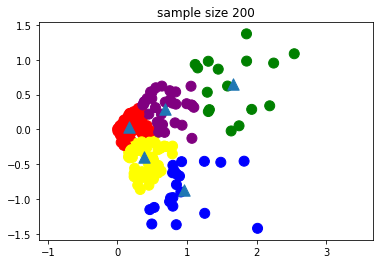

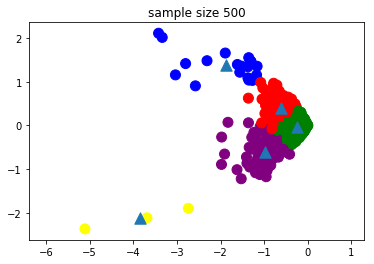

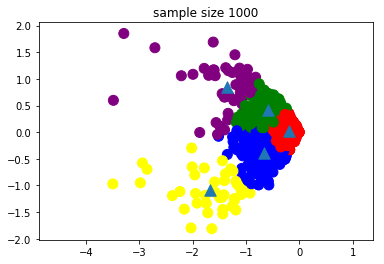

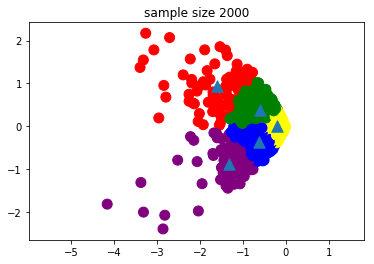

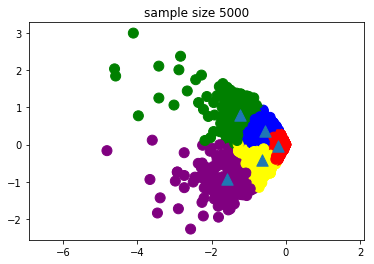

In [49]:
for size in sampleSizes:
    rindex = np.array(random.sample(xrange(len(df)),size))
    df2 = df.iloc[rindex]
    temp = df2.drop('Type',axis = 1)
    dataMatrix = temp.as_matrix()
    U,s,V = np.linalg.svd(dataMatrix,full_matrices = 0)
    B2 = np.dot(U[:,:2], np.diag(s)[0:2,0:2])
    y = df2['Type'].values
    start = time.time()
    kmeans = KMeans(n_clusters=5, random_state=0).fit(B2)
    end = time.time()
    print '\n'
    print 'sample size ', size
    print 'time cost ', end - start
    cl=kmeans.labels_
    cen=kmeans.cluster_centers_
    colors=['red','green','blue','yellow', 'purple']
    title = 'sample size ' + str(size)
    plt.figure()
    plt.title(title)
    plt.scatter(B2[:,0],B2[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
    plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
    plt.axis('equal')
    print crosstab(cl, y, rownames=['cl'], colnames=['y'])
    print 'ARI ', metrics.adjusted_rand_score(y,cl)

sample size = 2000 produces the best result for K-means. I also think there are some qualitative improvement: the data is more spread out, especially for sample size = 2000 or 1000, there are clearly 5 clusters, all clusters have more equal size (no one cluster contains almost all of points). But still we don't achieve good results in putting documents with same type together in one cluster. As the sample size increases, the centroids are kind of bundle up. Before, some centroids are far away from others, as the sample size increases, the centroids are closer to each other. The time cost scales pretty good: we know that the cost for K-means is O(Nkm), even though the sample size is about to double each time, the time in reality doesn't really double. 

so far, we don't achieve good results because SVD is linear projection and our data is not linear separable. Let's try one non linear projection and see how it goes!

In [50]:
rindex = np.array(random.sample(xrange(len(df)),1000))
df3 = df.iloc[rindex]
temp = df3.drop('Type',axis = 1)
dataMatrix = temp.as_matrix()
y = df3['Type'].values
print y.shape

(1000L,)


In [51]:
from sklearn import manifold
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
docs_new = tsne.fit_transform(dataMatrix)

In [52]:
docs_new.shape

(1000L, 2L)

y     1   2   3    4
cl                  
1    26  40  38   34
2    40  57  58   64
3   169  32  45   43
4     8  32  31  109
5    30  25  35   84


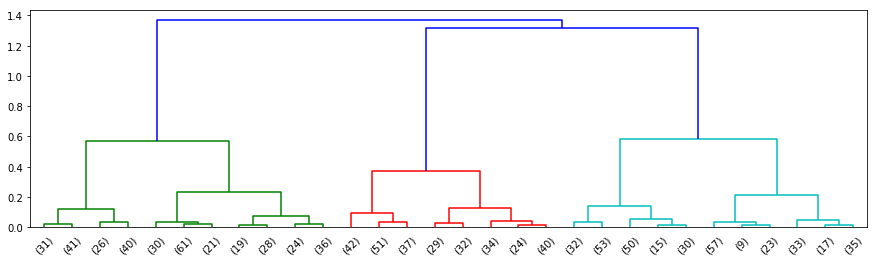

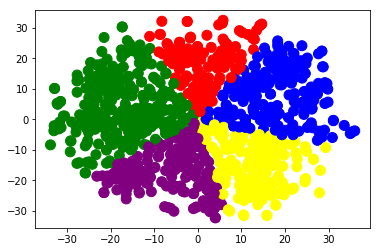

In [57]:
Z = hierarchy.linkage(docs_new,method = 'average', metric = 'cosine')
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z, truncate_mode = 'lastp')
colors = ['red', 'blue', 'green', 'yellow', 'purple']
plt.figure()
plt.scatter(docs_new[:,0], docs_new[:,1], c = cl, cmap = matplotlib.colors.ListedColormap(colors), s = 100, facecolors = 'None')
# for i in range(len(docs_new)):
#     plt.text(docs_new[i,0], docs_new[i,1] + 0.01, s = str(i), size = 10)

In [58]:
metrics.adjusted_rand_score(y,cl)

0.096997587768679297

y     1   2   3    4
cl                  
0   109  13  32   31
1    51  56  49   42
2    13  33  31  150
3    34  53  52   58
4    66  31  43   53
0.08450124084


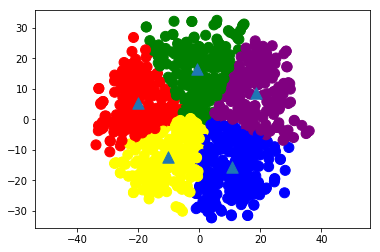

In [59]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(docs_new)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(docs_new[:,0],docs_new[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

print crosstab(cl, y, rownames=['cl'], colnames=['y'])
print metrics.adjusted_rand_score(y,cl)

Okayy! The result is not better, even though the clusters look way better now!